# Tensorflow

In [3]:
import pandas as pd

In [4]:
data = pd.read_excel("bisiklet_fiyatlari.xlsx")

In [5]:
data.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


In [6]:
import seaborn as sbn
import matplotlib.pyplot as plt

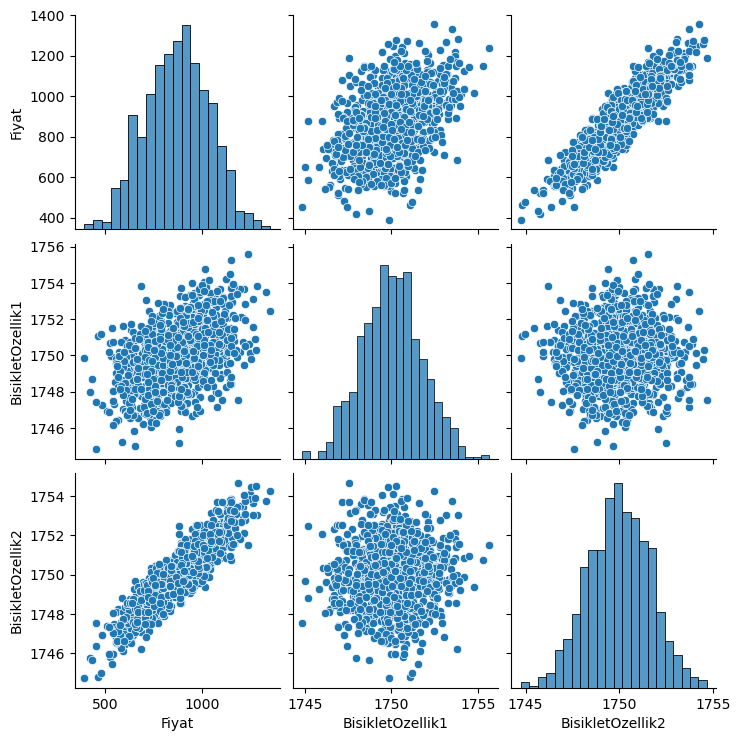

In [7]:
sbn.pairplot(data)

# Data preprocessing

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#train_test_split
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [10]:
data

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [11]:
 #y = wx + b
# y -> label
y = data["Fiyat"].values

# -> feaature
x=data[["BisikletOzellik1","BisikletOzellik2"]].values #pandas listesinden numpy dizii yapmak için .values
# veri bölme
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [12]:
x_train

array([[1748.374239, 1751.217187],
       [1751.580415, 1753.658535],
       [1750.727042, 1745.942278],
       ...,
       [1747.497907, 1750.085896],
       [1753.042364, 1746.84704 ],
       [1749.557564, 1746.592948]])

In [13]:
x_train.shape

(670, 2)

In [14]:
x_test.shape

(330, 2)

In [15]:
y_train.shape

(670,)

In [16]:
y_train

array([ 928.6952754, 1263.961903 ,  539.3910047,  909.0602356,
        827.5599926,  755.0897782,  871.0148095,  987.1951914,
       1072.273843 ,  694.625345 ,  750.4756224,  705.8022573,
        937.9704699,  699.7664082,  836.6511441,  957.4757753,
        692.5542986,  879.9817511, 1083.133861 ,  961.2584546,
        799.7283271,  890.4446699, 1043.475329 ,  581.3983762,
        921.2831591,  904.7251741,  749.7572009,  871.8325006,
        965.3876743, 1055.197693 , 1042.743866 ,  766.9644604,
       1129.98977  ,  775.1337641,  889.7252105,  704.0185578,
        937.2014327,  601.5369815, 1068.018878 ,  864.2491913,
        845.4859474, 1028.047418 ,  659.9882841,  812.2027726,
       1116.252739 ,  862.5282243,  888.309265 ,  781.6579817,
        988.8845581,  908.5516566,  811.7080229,  927.5018276,
        833.1474785, 1026.479661 , 1078.893552 ,  717.4170105,
        885.0577122,  836.6405309,  955.8568831, 1149.145803 ,
        806.2158674,  707.2491908, 1093.736882 ,  720.3

In [17]:
y_test.shape

(330,)

# Creating a model

## scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler() # object created

In [20]:
scaler.fit(x_train)

MinMaxScaler()

In [21]:
x_train = scaler.transform(x_train)
x_test = scaler.transform((x_test))

In [22]:
x_train

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [23]:
import tensorflow as tf

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = Sequential()

#katmanlar (Dense) /hidden layer on playground
model.add(Dense(4,activation="relu")) #hidden layer 1
model.add(Dense(4,activation="relu")) #hidden layer 2
model.add(Dense(4,activation="relu")) #hidden layer 3

model.add(Dense(1)) #sonuç için bir katman

model.compile(optimizer="rmsprop",loss = "mse") # tüm işlemleri çalışmaya hazır hale getir

# training

In [26]:
model.fit(x_train,y_train,epochs=250) # eğitimi başlat

Epoch 1/250
21/21 [==============================] - 1s 1ms/step - loss: 795777.5625
Epoch 2/250
21/21 [==============================] - 0s 950us/step - loss: 795630.5625
Epoch 3/250
21/21 [==============================] - 0s 950us/step - loss: 795475.3750
Epoch 4/250
21/21 [==============================] - 0s 950us/step - loss: 795297.1875
Epoch 5/250
21/21 [==============================] - 0s 950us/step - loss: 795091.9375
Epoch 6/250
21/21 [==============================] - 0s 1ms/step - loss: 794852.5625
Epoch 7/250
21/21 [==============================] - 0s 1000us/step - loss: 794573.6250
Epoch 8/250
21/21 [==============================] - 0s 1ms/step - loss: 794251.6250
Epoch 9/250
21/21 [==============================] - 0s 1000us/step - loss: 793879.8750
Epoch 10/250
21/21 [==============================] - 0s 1ms/step - loss: 793459.1250
Epoch 11/250
21/21 [==============================] - 0s 1000us/step - loss: 792982.6250
Epoch 12/250
21/21 [==========================

In [27]:
loss = model.history.history["loss"]

<AxesSubplot:>

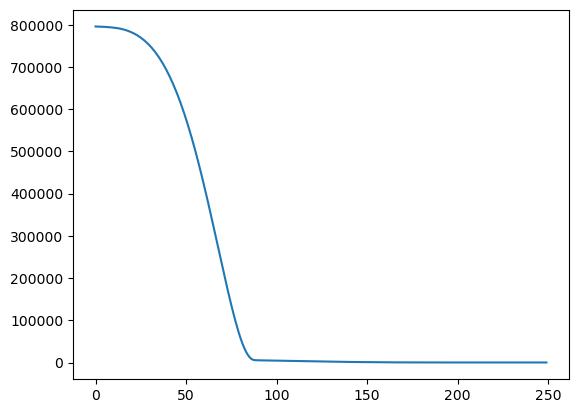

In [28]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [32]:
model.evaluate(x_train,y_train,verbose=0)

74.64542388916016

In [34]:
trainLoss = model.evaluate(x_train,y_train,verbose=0)

In [35]:
testLoss = model.evaluate(x_test,y_test,verbose=0)

In [36]:
trainLoss

74.64542388916016

In [37]:
testLoss

73.9150390625

# model değerlendirme

In [38]:
testPredictions = model.predict(x_test)

11/11 [==============================] - 0s 2ms/step


In [39]:
testPredictions

array([[1079.352  ],
       [ 624.55273],
       [ 877.3031 ],
       [ 895.3867 ],
       [ 900.6467 ],
       [ 451.84158],
       [ 932.40796],
       [ 992.8    ],
       [ 942.5463 ],
       [1018.21313],
       [ 751.9016 ],
       [ 919.1659 ],
       [ 948.7711 ],
       [1056.221  ],
       [1123.1396 ],
       [ 682.3744 ],
       [1128.5713 ],
       [ 651.63965],
       [1156.2395 ],
       [ 887.7494 ],
       [ 894.0233 ],
       [ 717.7103 ],
       [ 457.3279 ],
       [ 612.66235],
       [ 836.13306],
       [1092.8103 ],
       [ 714.6454 ],
       [ 757.82904],
       [ 874.6157 ],
       [ 771.5919 ],
       [ 451.65146],
       [ 784.0922 ],
       [ 729.1847 ],
       [ 647.5416 ],
       [ 887.9148 ],
       [ 844.9102 ],
       [1037.2212 ],
       [1024.2191 ],
       [ 846.0658 ],
       [ 863.3544 ],
       [ 758.11096],
       [1176.2898 ],
       [1099.2045 ],
       [1089.4021 ],
       [ 874.39606],
       [ 597.29297],
       [1147.3745 ],
       [ 974.

In [41]:
predictDF = pd.DataFrame(y_test,columns=["Real Y"])

In [42]:
predictDF

,Real Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [43]:
predictDF.shape

(330, 1)

In [44]:
testPredictions = pd.Series(testPredictions.reshape(330,))

In [45]:
testPredictions

0      1079.352051
1       624.552734
2       877.303101
3       895.386719
4       900.646729
          ...     
325    1015.007385
326     791.798462
327     766.962158
328    1169.331787
329     803.739258
Length: 330, dtype: float32

In [46]:
predictDF = pd.concat([predictDF,testPredictions],axis=1)

In [47]:
predictDF

,Real Y,0
0,1081.652164,1079.352051
1,622.675990,624.552734
2,889.356810,877.303101
3,902.826733,895.386719
4,897.662404,900.646729
...,...,...
325,1028.438035,1015.007385
326,789.934950,791.798462
327,758.490486,766.962158
328,1172.871659,1169.331787


In [48]:
predictDF.columns= ["Real Y","Predict Y"]

In [49]:
predictDF

,Real Y,Predict Y
0,1081.652164,1079.352051
1,622.675990,624.552734
2,889.356810,877.303101
3,902.826733,895.386719
4,897.662404,900.646729
...,...,...
325,1028.438035,1015.007385
326,789.934950,791.798462
327,758.490486,766.962158
328,1172.871659,1169.331787


<AxesSubplot:xlabel='Real Y', ylabel='Predict Y'>

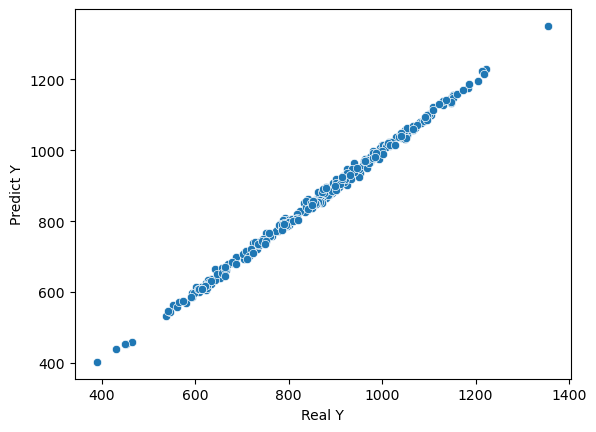

In [50]:
sbn.scatterplot(x="Real Y", y = "Predict Y",data=predictDF)

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [54]:
mean_absolute_error(predictDF["Real Y"],predictDF["Predict Y"]) #hata

6.888979645048527

In [55]:
mean_squared_error(predictDF["Real Y"],predictDF["Predict Y"])

73.91504048005771

In [56]:
data.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


# model predictions (save)

In [66]:
newData = [[1751,1750]]

In [67]:
newData = scaler.transform(newData)

In [68]:
model.predict(newData)

1/1 [==============================] - 0s 31ms/step


array([[915.65015]], dtype=float32)

In [69]:
from tensorflow.keras.models import load_model

In [70]:
model.save("bisiklet_modeli.h5") # model save

In [71]:
call = load_model("bisiklet_modeli.h5")

In [72]:
call.predict(newData)

1/1 [==============================] - 0s 61ms/step


array([[915.65015]], dtype=float32)

# Car prices analyzing
learning practise